In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jpegCompressor
from PIL import Image
import func

11174


Text(0.5, 1.0, 'after decompress q = 100')

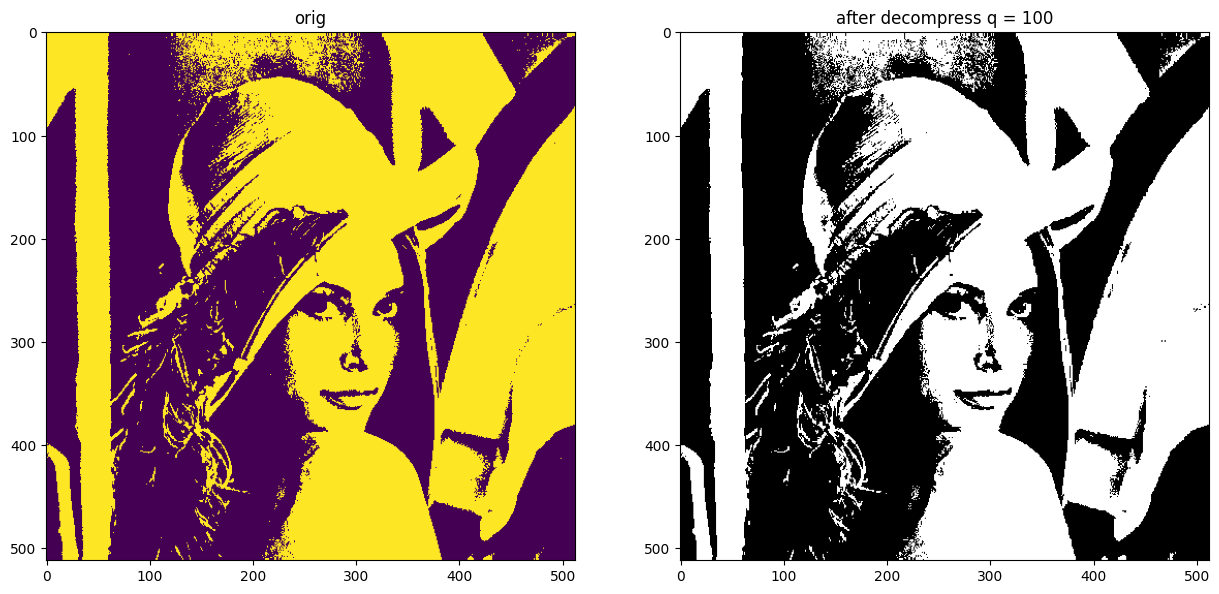

In [2]:
import time
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
im = np.array(Image.open('./data/Lenna_WD.png'))
# c = jpegCompressor.compress(im, 50)
# print(len(c))
# r, g, b = jpegCompressor.decompress(c, 50)

# print(r)
# r, g, b = Image.fromarray(r), Image.fromarray(g), Image.fromarray(b)
# d_im = Image.merge('RGB', (r, g, b))
# ax[1].imshow(d_im)
# ax[1].set_title('after decompress q = 98')

print('=================================')
c = jpegCompressor.compress(im, 0)
print(len(c))
print('=================================')
r, g, b = jpegCompressor.decompress(c, 0)
r, g, b = Image.fromarray(r), Image.fromarray(g), Image.fromarray(b)
d_im = Image.merge('RGB', (r, g, b))

ax[0].imshow(im)
ax[0].set_title('orig')

ax[1].imshow(d_im)
ax[1].set_title('after decompress q = 100')



In [2]:
# Create data: compress + decompress (RGB + GS)
path = './data/'
files = path + np.array(['Lenna'] * 2 + ['img'] * 2) + np.array(['.png', '_GS.png'] * 2) 
decomp_images = dict().fromkeys(files)
print(files)
for key in decomp_images:
    decomp_images[key] = []
#print(decomp_images)
quality = [0, 20, 40, 60, 80, 100]
for file in files:
    im = Image.open(file)
    for q in quality:
            c = jpegCompressor.compress(np.array(im), q)
            f = open('./comp_data/' + file[len(path):-4] + 'q' + str(q), 'wb')
            f.write(c)
            f.close()
            r, g, b = jpegCompressor.decompress(c, q)
            r, g, b = Image.fromarray(r), Image.fromarray(g), Image.fromarray(b)
            d_img = Image.merge("RGB", (r, g, b))
            decomp_images[file].append(d_img)
            print(file, q)
    
    
 


['./data/Lenna.png' './data/Lenna_GS.png' './data/img.png'
 './data/img_GS.png']
./data/Lenna.png 0
./data/Lenna.png 20
./data/Lenna.png 40
./data/Lenna.png 60
./data/Lenna.png 80
./data/Lenna.png 90
./data/Lenna_GS.png 0
./data/Lenna_GS.png 20
./data/Lenna_GS.png 40
./data/Lenna_GS.png 60
./data/Lenna_GS.png 80
./data/Lenna_GS.png 90
./data/img.png 0
./data/img.png 20
./data/img.png 40
./data/img.png 60
./data/img.png 80
./data/img.png 90
./data/img_GS.png 0
./data/img_GS.png 20
./data/img_GS.png 40
./data/img_GS.png 60
./data/img_GS.png 80
./data/img_GS.png 90


In [6]:
# Create data: compress + decompress (WD + D)
path = './data/'
files = path + np.array(['Lenna'] * 2 + ['img'] * 2) + np.array(['_WD.png', '_D.png'] * 2) 
decomp_images_2 = dict().fromkeys(files)
print(files)
for key in decomp_images_2:
    decomp_images_2[key] = []
#print(decomp_images)
quality = [0, 20, 40, 60, 80, 100]
for file in files:
    im = Image.open(file)
    for q in quality:
            c = jpegCompressor.compress(np.array(im), q)
            f = open('./comp_data/' + file[len(path):-4] + 'q' + str(q), 'wb')
            f.write(c)
            f.close()
            r, g, b = jpegCompressor.decompress(c, q)
            r, g, b = Image.fromarray(r), Image.fromarray(g), Image.fromarray(b)
            d_img = Image.merge("RGB", (r, g, b))
            decomp_images_2[file].append(d_img)
            print(file, q)
    
    
 


['./data/Lenna_WD.png' './data/Lenna_D.png' './data/img_WD.png'
 './data/img_D.png']
./data/Lenna_WD.png 0
./data/Lenna_WD.png 20
./data/Lenna_WD.png 40
./data/Lenna_WD.png 60
./data/Lenna_WD.png 65
./data/Lenna_WD.png 70
./data/Lenna_D.png 0
./data/Lenna_D.png 20
./data/Lenna_D.png 40
./data/Lenna_D.png 60
./data/Lenna_D.png 65
./data/Lenna_D.png 70
./data/img_WD.png 0
./data/img_WD.png 20
./data/img_WD.png 40
./data/img_WD.png 60
./data/img_WD.png 65
./data/img_WD.png 70
./data/img_D.png 0
./data/img_D.png 20


MemoryError: 

C:\Users\KIRIL\AppData\Local\Temp\ipykernel_19740\1600639866.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig2, ax2 = plt.subplots()


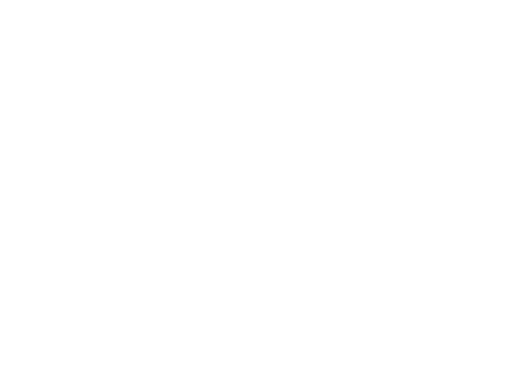

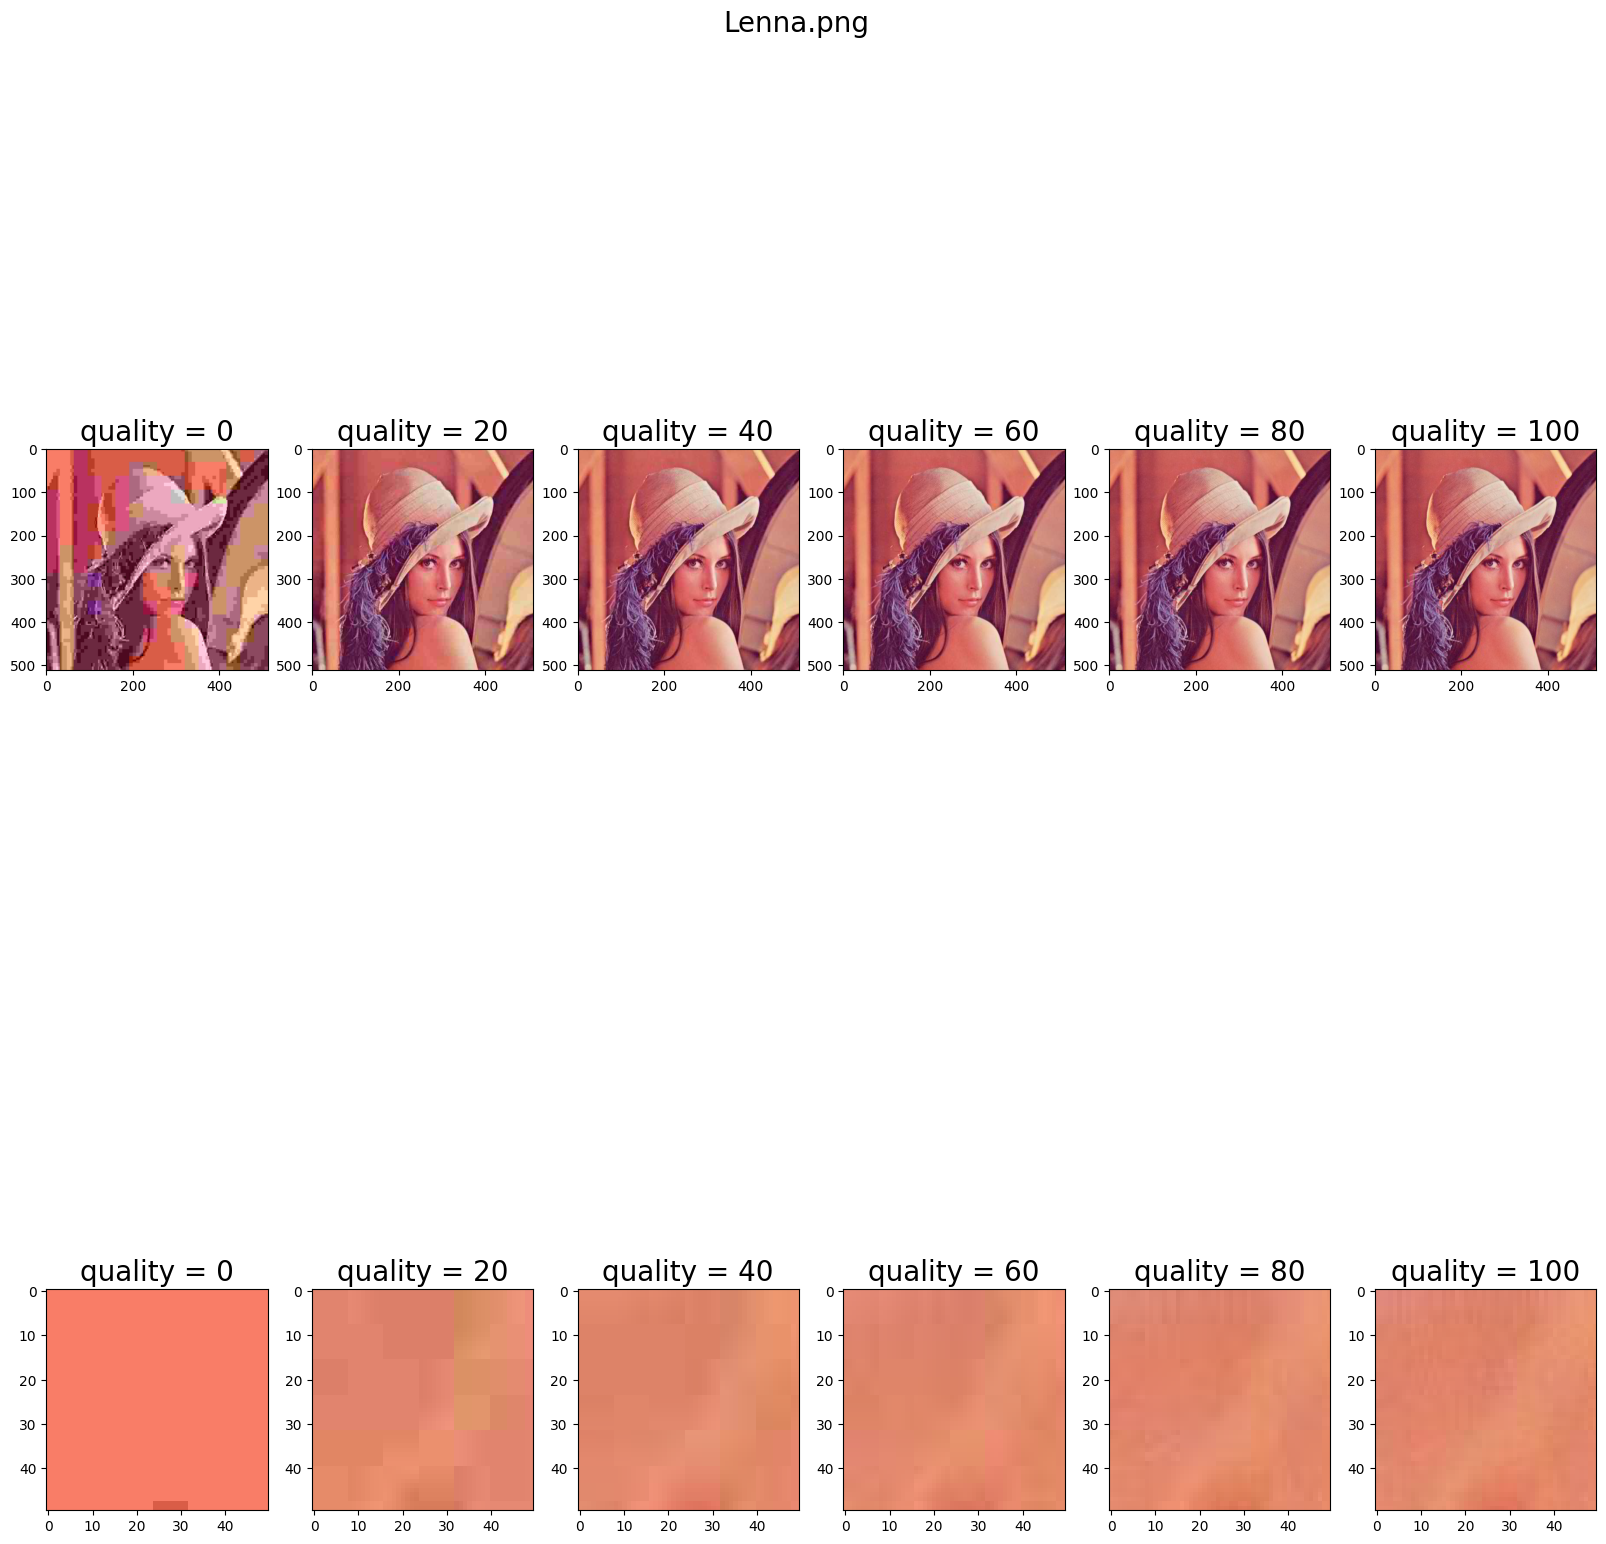

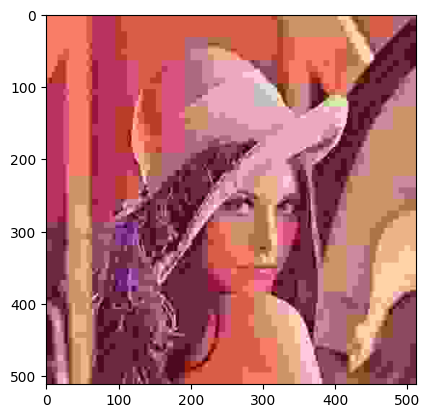

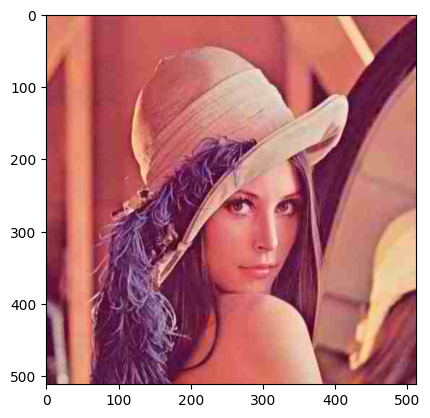

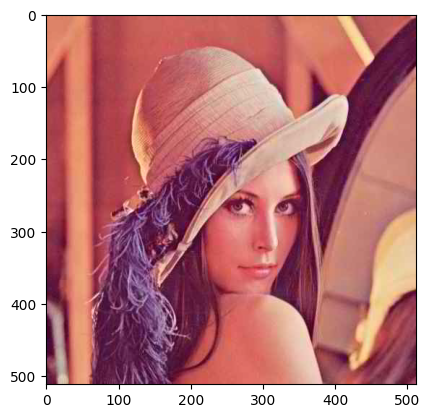

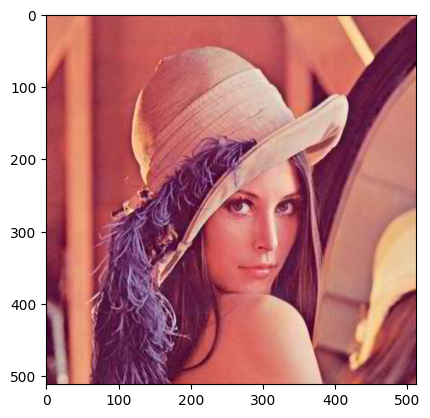

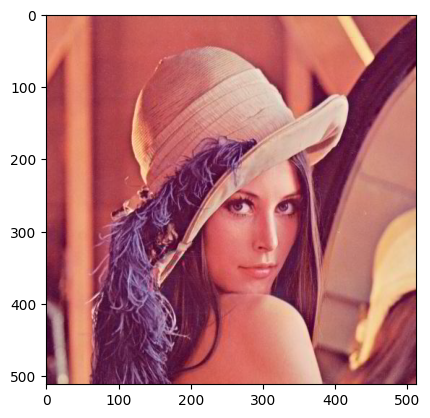

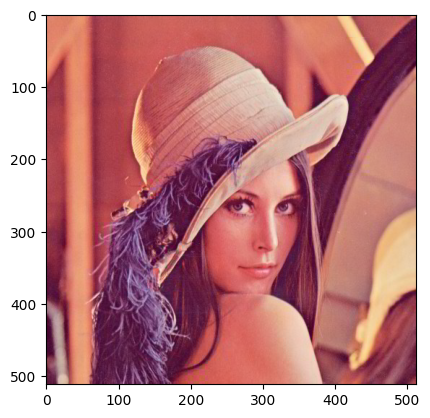

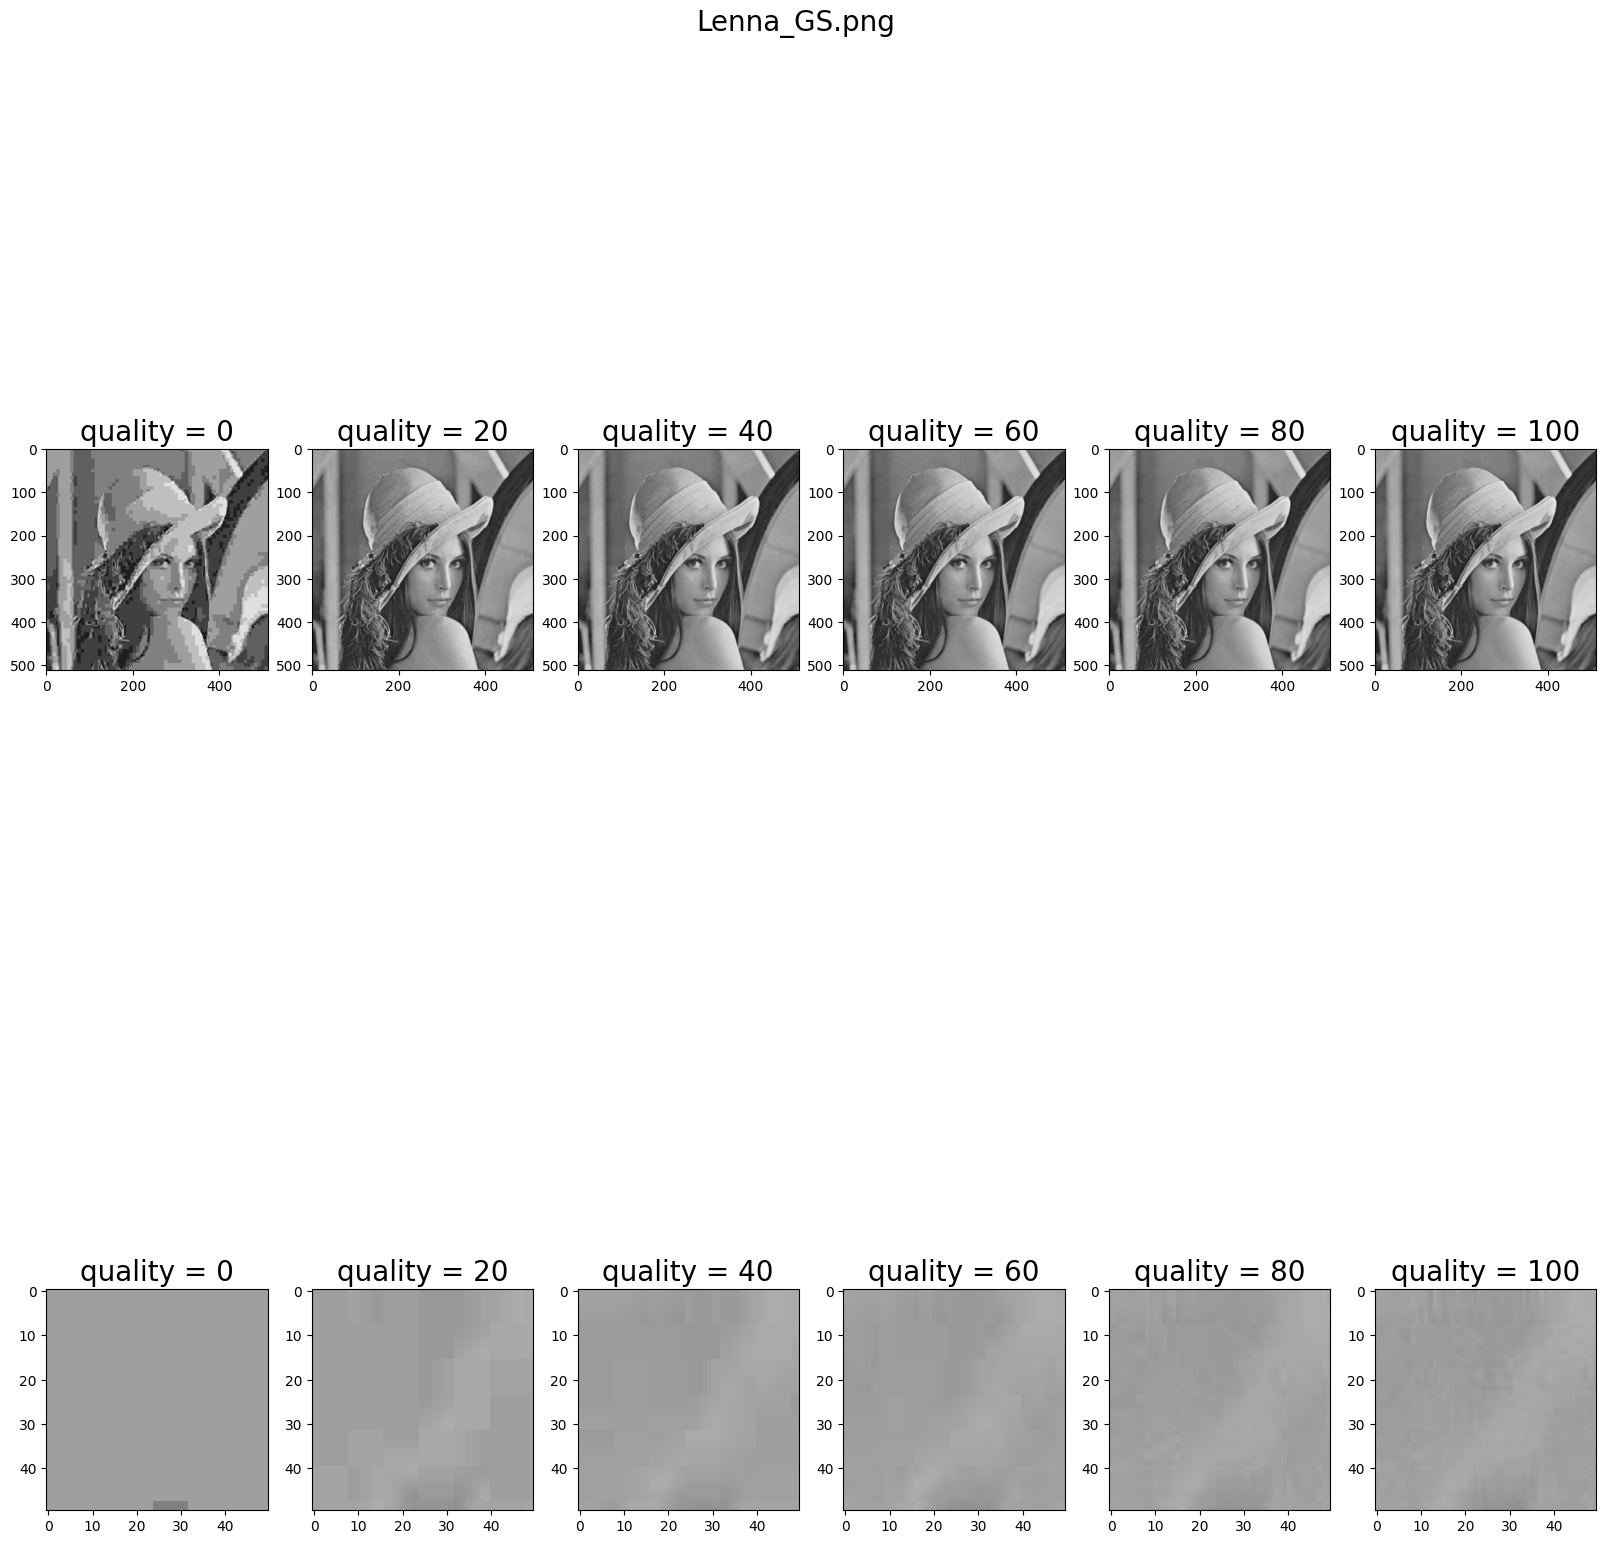

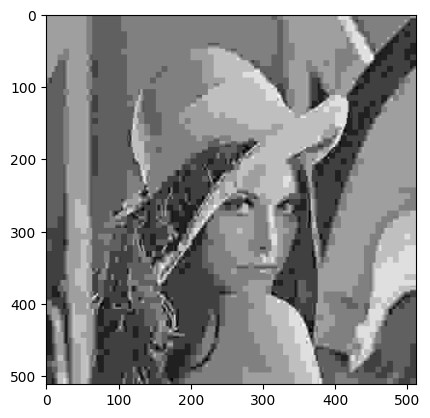

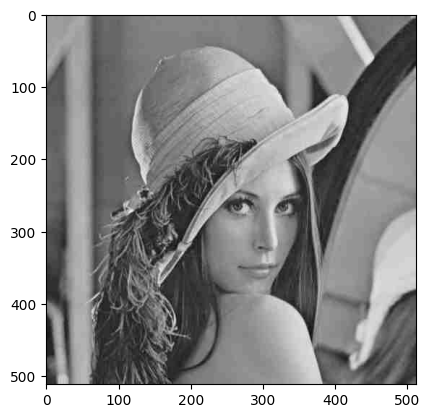

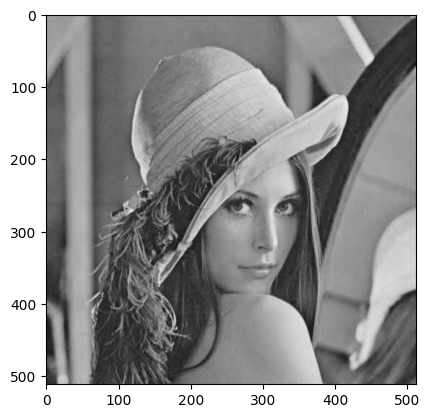

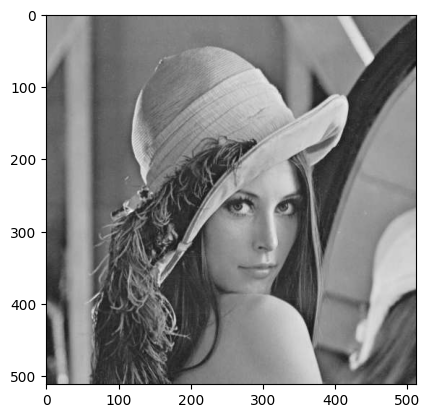

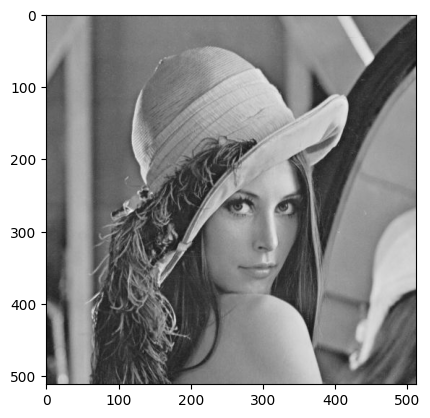

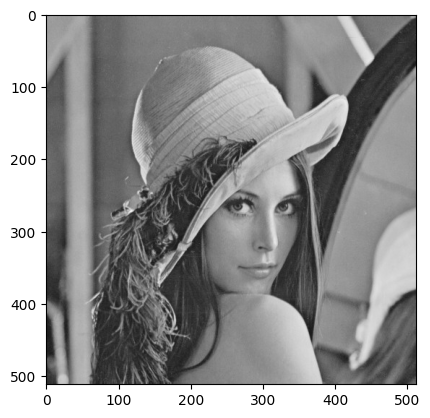

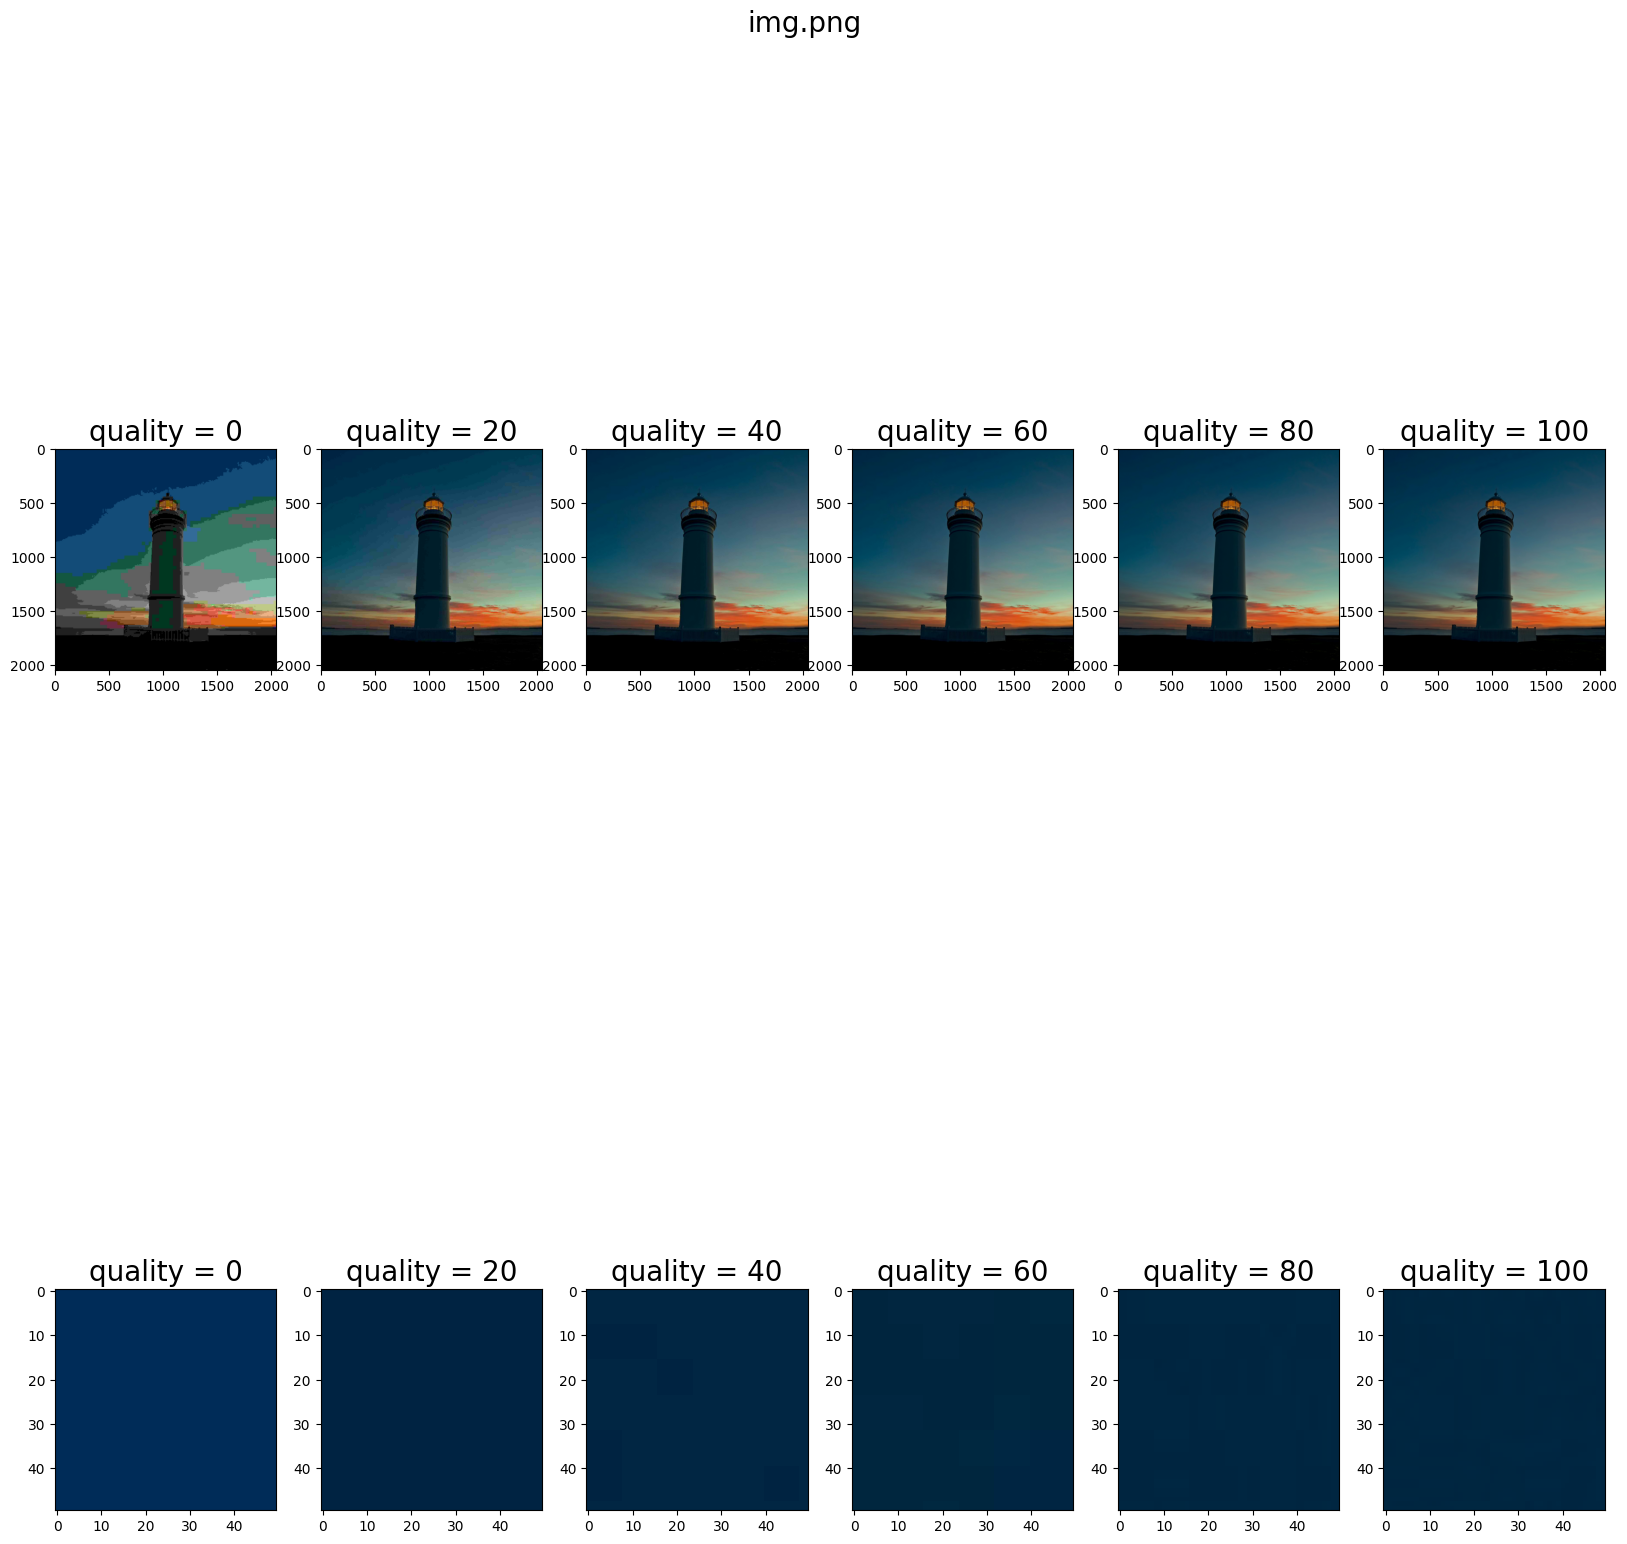

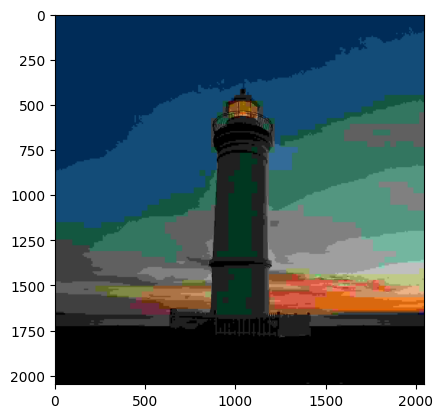

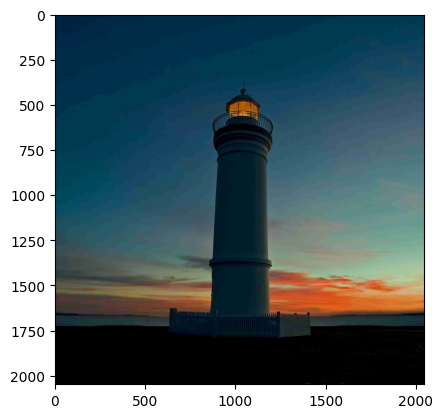

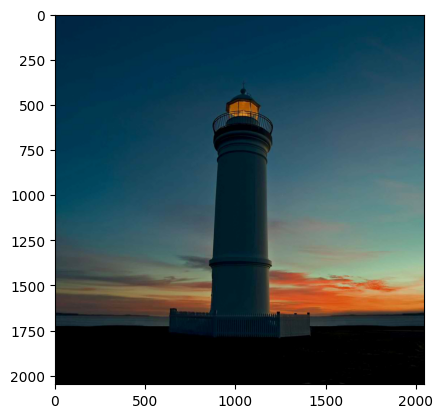

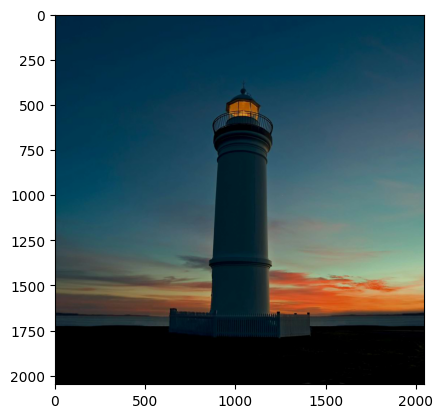

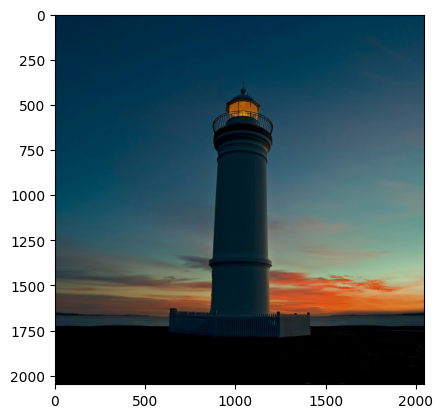

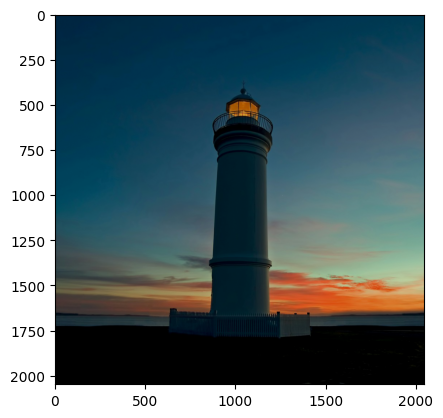

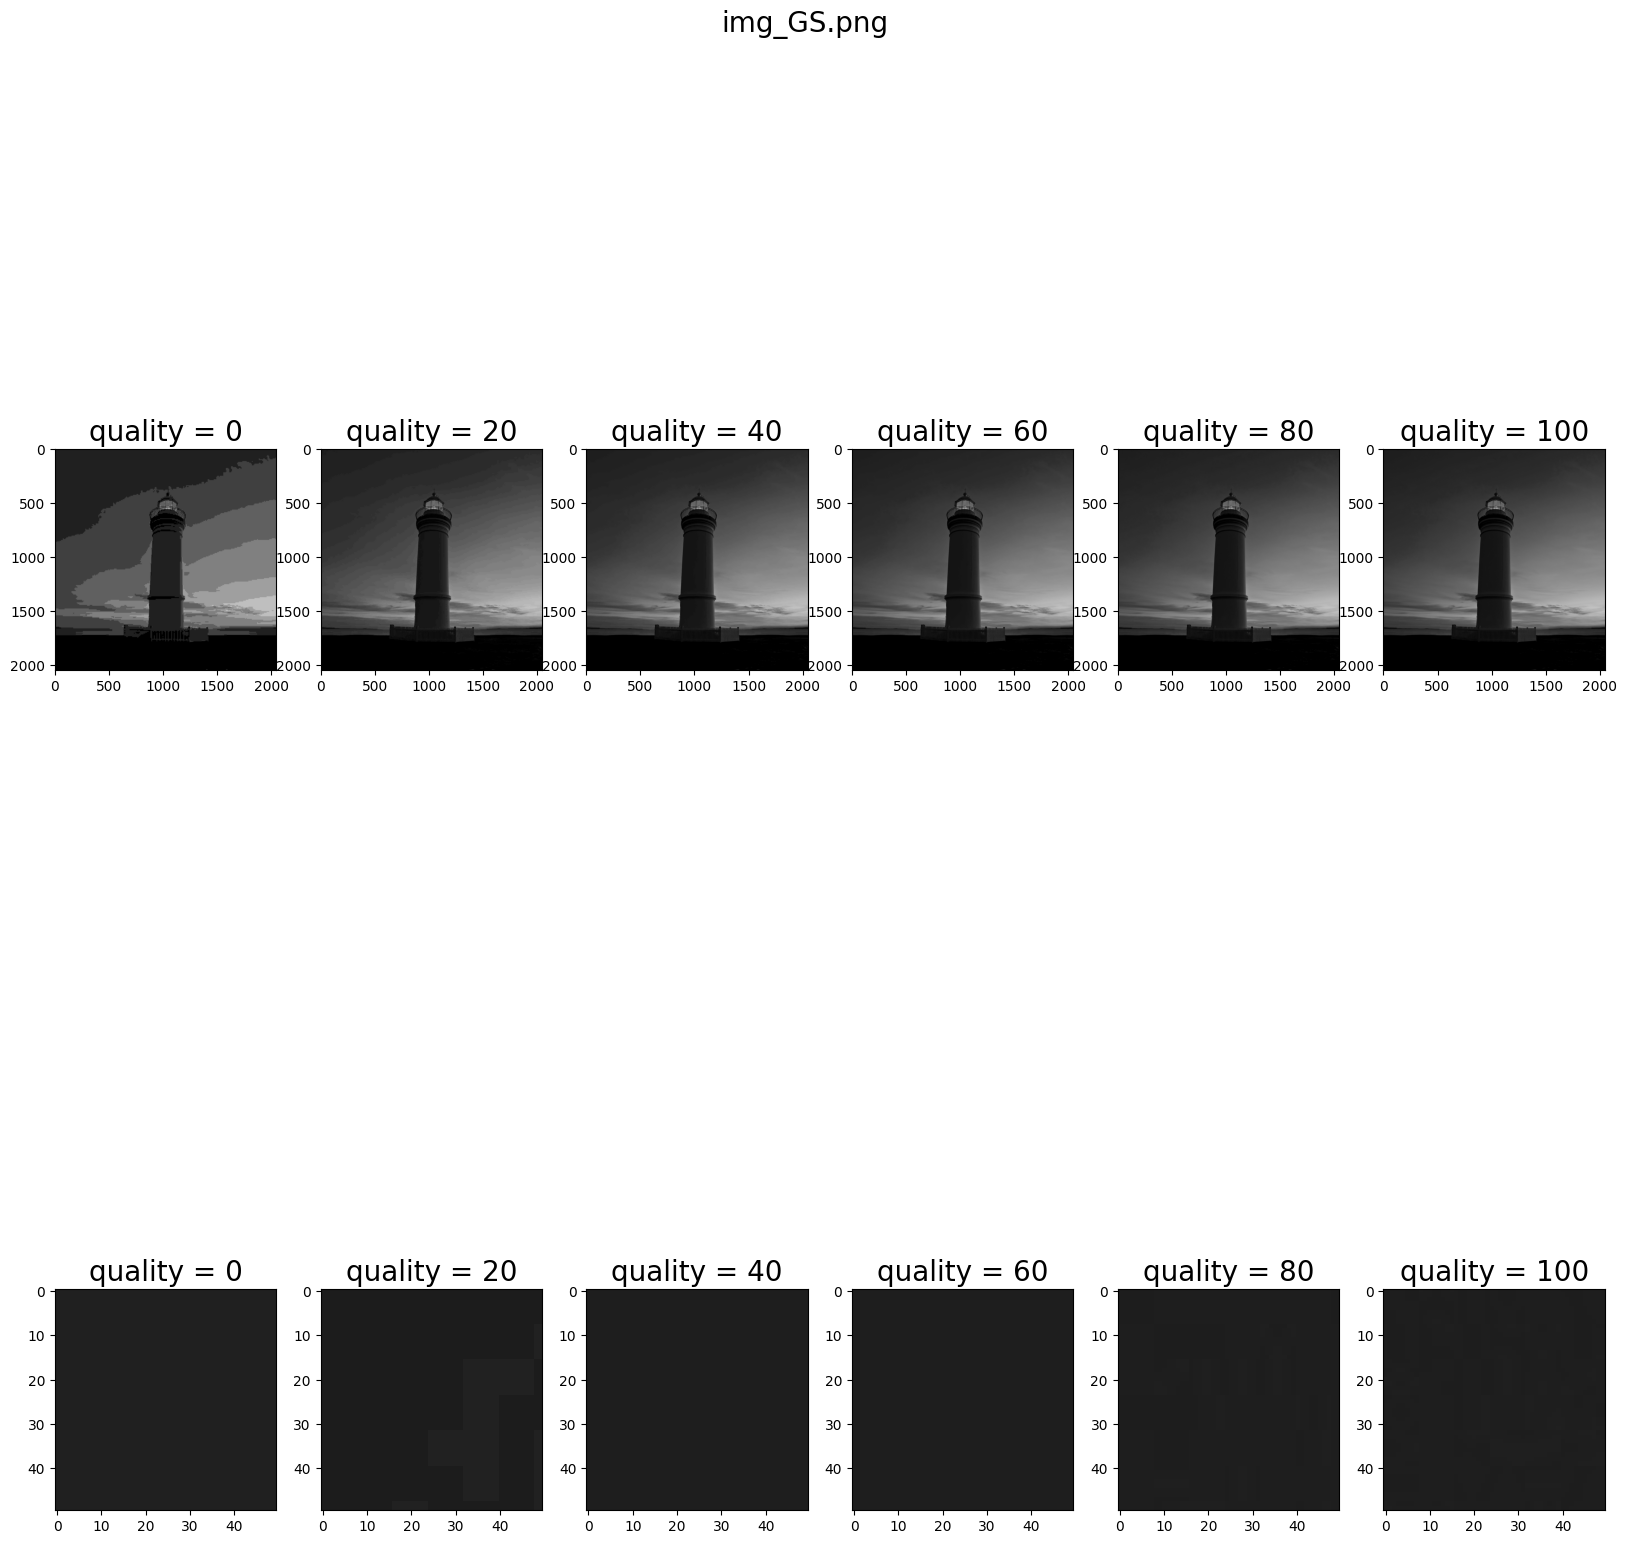

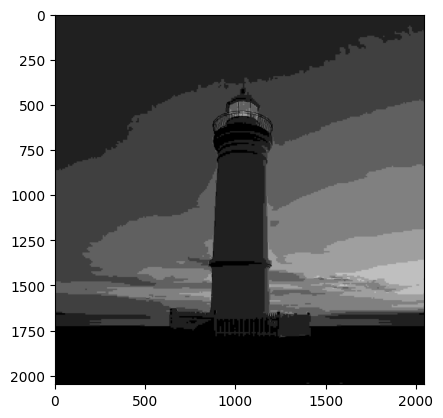

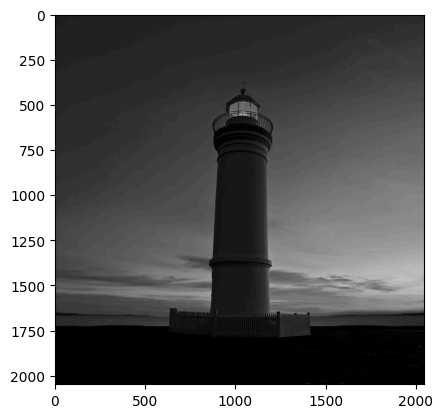

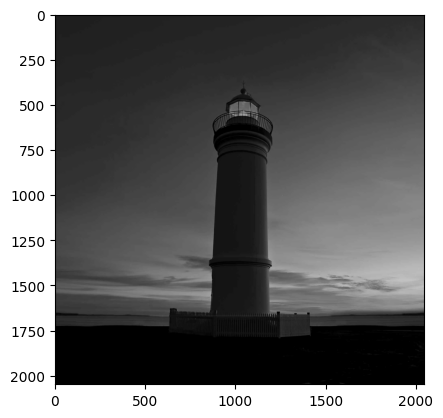

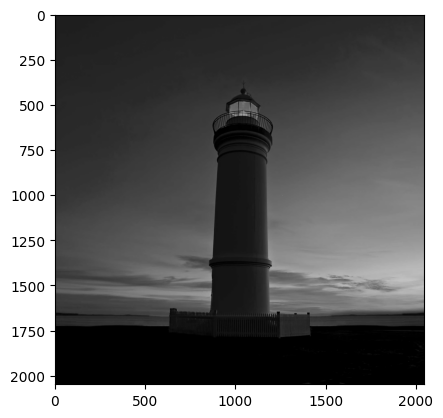

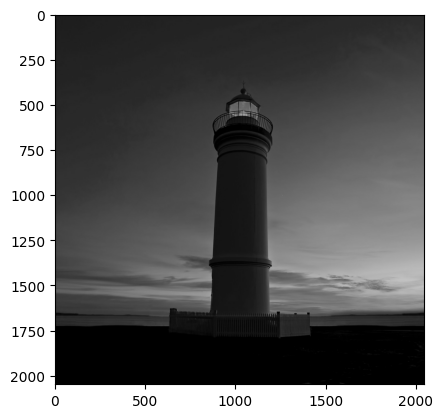

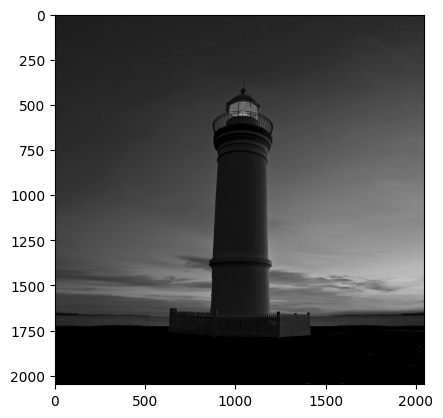

In [18]:
# img for dif quality
plt.axis('off')
save_path = './decomp_images/'
quality = [0, 20, 40, 60, 80, 90]
size = 50
q = ['0', '20', '40', '60', '80', '100']
for file in files:
    fig, ax = plt.subplots(2, len(list(quality)), figsize = (20, 20))
    i = 0
    fig.suptitle(file[7:], fontsize = 20)
    q_iter = iter(q)
    for im in decomp_images[file]:
        ax[0, i].imshow(im)
        block = Image.fromarray(np.array(im)[:size, :size])
        fig2, ax2 = plt.subplots()
        ax2.imshow(im)
        fig2.savefig(save_path + file[6:-4] + next(q_iter) + '.png')
        ax[1, i].imshow(block)
        ax[0, i].set_title(f'quality = {q[i]}', fontsize = 20)
        ax[1, i].set_title(f'quality = {q[i]}', fontsize = 20)
        i+=1
    fig.savefig(save_path + file[6:])

In [ ]:
# img for dif quality (WD + D)
plt.axis('off')
save_path = './decomp_images/'
quality = [0, 20, 40, 60, 80, 100]
size = 50
q = ['0', '20', '40', '60', '80', '100']
files = path + np.array(['Lenna'] * 2 + ['img'] * 2) + np.array(['_WD.png', '_D.png'] * 2) 
for file in files:
    fig, ax = plt.subplots(2, len(list(quality)), figsize = (20, 20))
    i = 0
    fig.suptitle(file[7:], fontsize = 20)
    q_iter = iter(q)
    for im in decomp_images_2[file]:
        ax[0, i].imshow(im)
        block = Image.fromarray(np.array(im)[:size, :size])
        fig2, ax2 = plt.subplots()
        ax2.imshow(im)
        fig2.savefig(save_path + file[6:-4] + next(q_iter) + '.png')
        ax[1, i].imshow(block)
        ax[0, i].set_title(f'quality = {q[i]}', fontsize = 20)
        ax[1, i].set_title(f'quality = {q[i]}', fontsize = 20)
        i+=1
    fig.savefig(save_path + file[6:])

In [ ]:
import os

In [ ]:
os.system('shutdown /s /t 0')

In [4]:
# data for graphics
quality = range(0, 105, 5)


file_sizes = dict().fromkeys([file[7:][:-4] for file in files])
for i in file_sizes:
    file_sizes[i] = []

for file in files:
    im = Image.open(file)
    for q in quality:
        c = jpegCompressor.compress(np.array(im), q)
        file_sizes[file[7:][:-4]].append(len(c))
        print(file, q)
    


    

./data/Lenna.png 0
./data/Lenna.png 5
./data/Lenna.png 10
./data/Lenna.png 15
./data/Lenna.png 20
./data/Lenna.png 25
./data/Lenna.png 30
./data/Lenna.png 35
./data/Lenna.png 40
./data/Lenna.png 45
./data/Lenna.png 50
./data/Lenna.png 55
./data/Lenna.png 60
./data/Lenna.png 65
./data/Lenna.png 70
./data/Lenna.png 75
./data/Lenna.png 80
./data/Lenna.png 85
./data/Lenna.png 90
./data/Lenna.png 95
./data/Lenna_GS.png 0
./data/Lenna_GS.png 5
./data/Lenna_GS.png 10
./data/Lenna_GS.png 15
./data/Lenna_GS.png 20
./data/Lenna_GS.png 25
./data/Lenna_GS.png 30
./data/Lenna_GS.png 35
./data/Lenna_GS.png 40
./data/Lenna_GS.png 45
./data/Lenna_GS.png 50
./data/Lenna_GS.png 55
./data/Lenna_GS.png 60
./data/Lenna_GS.png 65
./data/Lenna_GS.png 70
./data/Lenna_GS.png 75
./data/Lenna_GS.png 80
./data/Lenna_GS.png 85
./data/Lenna_GS.png 90
./data/Lenna_GS.png 95
./data/Lenna_D.png 0
./data/Lenna_D.png 5
./data/Lenna_D.png 10
./data/Lenna_D.png 15
./data/Lenna_D.png 20
./data/Lenna_D.png 25
./data/Lenna_D

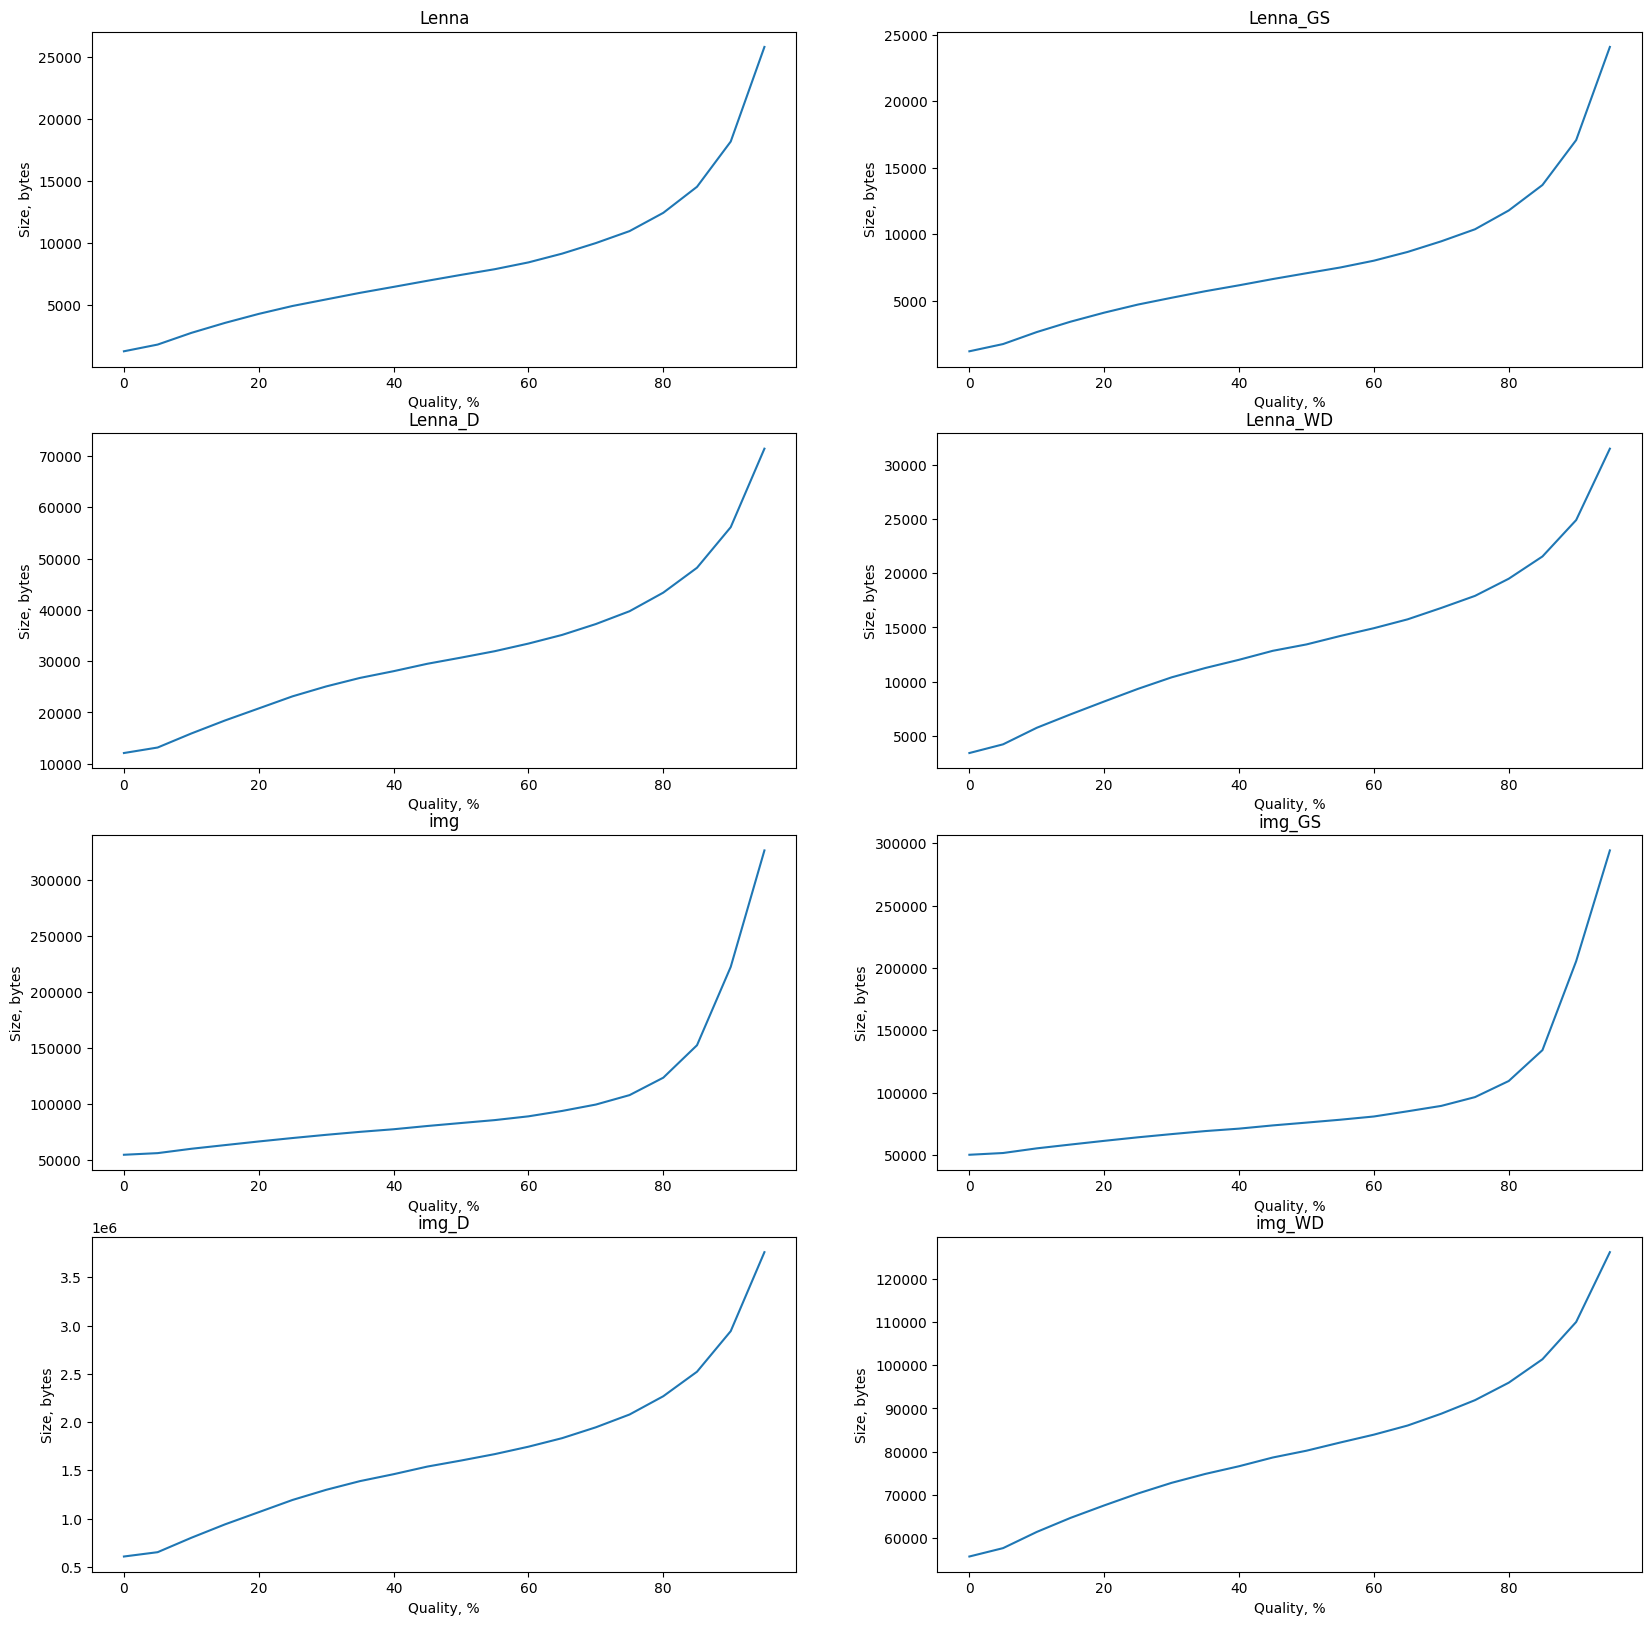

In [7]:
# graphics
file_iter = iter(file_sizes)
rows, cols = 4, 2
fig, ax = plt.subplots(rows, cols, figsize = (20, 20))
for i in range(rows):
    for j in range(cols):
        file = next(file_iter)
        ax[i, j].plot(np.array(quality), np.array(file_sizes[file]))
        ax[i, j].set_title(file)
        ax[i, j].set_xlabel('Quality, %')
        ax[i, j].set_ylabel('Size, bytes')
fig.savefig('graphics/graphics.png')


In [3]:
# graphics
quality = range(0, 105, 5)
orig_size = dict()
for file in files:
    f = open('./data/raw_data' + file[7:], 'rb')
    orig_size[file[7:][:-4]] = len(f.read())
    f.close()
fig, ax = plt.subplots(figsize = (15, 15))
for file in file_sizes:
    y = np.array(file_sizes[file]) / orig_size[file]
    ax.plot(np.array(quality), y, label = file if y.max() > 1 else '', color = 'g' if y.max() < 1 else None)
ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label = '1 (orig_size = comp_size)')
fig.legend()
ax.set_xlabel('Quality, %', fontsize = 14)
ax.set_ylabel('comp_size/orig_size', fontsize = 14)
fig.savefig('graphics/graphics2.png')

NameError: name 'files' is not defined

'Lenna_GS.png'

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import jpegCompressor
from PIL import Image
import func
q = [0, 20, 40, 60, 80, 100]
q_str = ['0', '20', '40', '60', '80', '100']
files = np.array(['./data/img']) + np.array(['_GS.png', '_WD.png'])
for file in files:
    for i in range(len(q)):
        im = Image.open(file)
        im = np.array(im)
        c = jpegCompressor.compress(im, quality = q[i])
        r, g, b = jpegCompressor.decompress(c, quality = q[i])
        r, g, b = Image.fromarray(r), Image.fromarray(g), Image.fromarray(b)
        d_im = Image.merge('RGB',(r, g, b))
        d_im.save('./decomp_images/' + file[7:-4] + q_str[i] + '.png')
    print(file)
    


./data/img_GS.png


'Lenna'